# 1D Vlasov–Ampere system

$$
 \frac{∂f}{∂t} + υ \frac{∂f}{∂x}
 - E(t,x) \frac{∂f}{∂υ} = 0
$$

$$
 \frac{∂E}{∂t} = - J = ∫ fυ dυ
$$

## Algorithm

 - For each $j$ compute discrete Fourier transform in $x$ of
   $(x_i,υ_j)$ yielding $f_k^n(υ_j)$,
 - For $ k \neq 0 $

     - Compute

     $$ f^{n+1}_k(υ_j) = e^{−2iπ k υ Δt/L} f_n^k(υ_j), $$

     - Compute

     $$ ρ_k^{n+1} = Δ υ ∑_j􏰄 f^{n+1}_k(υ_j), $$

     - Compute

     $$ E^{n+1}_k = ρ^{n+1}_k L/(2iπkϵ_0), $$

 - For $k = 0$ do nothing:

 $$ f_{n+1}(υ_j) = f^n_k(υ_j), E^{n+1}_k = E^n_k. $$


 - Perform inverse discrete Fourier transform of $E^{n+1}_k$ and for each
   $j$ of $f^{n+1}_k (υ_j)$.



In [1]:
using Plots, LinearAlgebra
pyplot()

Plots.PyPlotBackend()

In [2]:
using Splittings

In [3]:
function push_v!(f, fᵀ, meshx, meshv, e, dt)
    transpose!(f,fᵀ)
    e .= advection!( f, meshx, meshv, dt)
    transpose!(fᵀ,f)
end    

push_v! (generic function with 1 method)

In [4]:
function vm1d( nx, nv, xmin, xmax, vmin, vmax , tf, nt)

    meshx = UniformMesh(xmin, xmax, nx, endpoint=false)
    meshv = UniformMesh(vmin, vmax, nv, endpoint=false)

    x = meshx.x
    v = meshv.x
    ϵ, kx = 0.001, 0.5

    f = zeros(Complex{Float64},(nx,nv))
    fᵀ= zeros(Complex{Float64},(nv,nx))

    f .= (1.0.+ϵ*cos.(kx*x))/sqrt(2π) .* transpose(exp.(-0.5*v.*v))
    transpose!(fᵀ,f)

    ρ  = compute_rho(meshv, f)
    e  = zeros(Float64,nx)
    e .= compute_e(meshx, ρ)

    nrj = Float64[]

    dt = tf / nt

    for i in 1:nt
        push!(nrj, 0.5*log(sum(e.^2)*meshx.dx))
        @Strang(
            advection!(fᵀ, meshx, meshv, e, dt),
            push_v!(f, fᵀ, meshx, meshv, e, dt)
        )
    end
    nrj
end

vm1d (generic function with 1 method)

 22.551314 seconds (9.79 M allocations: 18.154 GiB, 6.70% gc time)


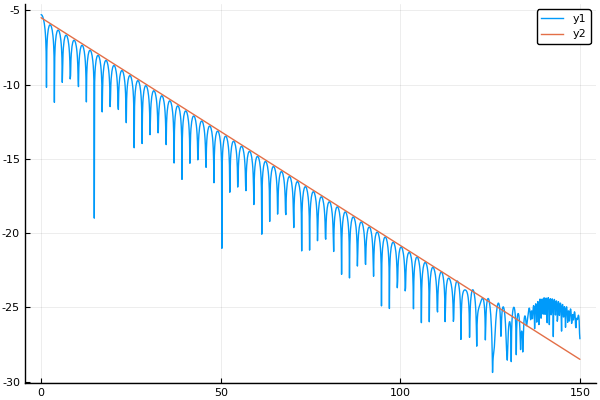

In [5]:
nx, nv = 256, 512
xmin, xmax =  0., 4π
vmin, vmax = -6., 6.
tf = 150
nt = 1500

t = range(0,stop=tf,length=nt)
@time nrj = vm1d(nx, nv, xmin, xmax, vmin, vmax, tf, nt) 
plot(t, nrj )
plot!(t, -0.1533*t.-5.50)